In [5]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import os
# os.getcwd()
os.chdir('/Users/adshah/Documents/Python/Jupyter Notebooks/')
os.getcwd()

'/Users/adshah/Documents/Python/Jupyter Notebooks'

In [6]:
interactions_df = pd.read_csv('data/goodreads_interactions_mystery_thriller_crime.csv')
print(interactions_df.shape)
interactions_df.head(3)

(24799896, 10)


,book_id,date_added,date_updated,is_read,rating,read_at,review_id,review_text_incomplete,started_at,user_id
0,6392944,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,True,3,Tue Jul 25 00:00:00 -0700 2017,5e212a62bced17b4dbe41150e5bb9037,I haven't read a fun mystery book in a while a...,Mon Jul 24 00:00:00 -0700 2017,8842281e1d1347389f2ab93d60773d4d
1,2279538,Wed Mar 29 00:27:14 -0700 2017,Wed Mar 29 00:27:14 -0700 2017,False,0,NaN,556e9e3f00fb5b7e4eaa116764b771b0,NaN,NaN,8842281e1d1347389f2ab93d60773d4d
2,20821043,Mon Mar 27 22:52:11 -0700 2017,Mon Mar 27 22:52:12 -0700 2017,False,0,NaN,4b15f8a08f04a17f9a47f2b76fec21e5,NaN,NaN,8842281e1d1347389f2ab93d60773d4d


In [7]:
#10 ,8 read -> 80%
# out of all books he read, how many were a part of our recommended list.

In [8]:
filtered=interactions_df[interactions_df['is_read']==True]

In [9]:
filtered['started_year']=filtered['started_at'].map(str).apply(lambda x:x[-4:])

In [10]:
filtered['started_year'].value_counts()

nan     8245609
2017     968260
2016     943340
2015     727660
2014     567668
         ...   
1436          1
0001          1
1917          1
2556          1
1900          1
Name: started_year, Length: 78, dtype: int64

In [11]:
len(filtered[filtered.started_at.isnull()])

8245609

In [9]:
import datetime as dt
dt_string=filtered['started_at'].iloc[1]

In [12]:
print(dt_string)

Fri Mar 17 23:45:40 -0700 2017


In [18]:
dt_string[-4:]

'2017'

In [14]:
#we initially thought about splitting the data yearwise...that would be interesting to see.
#However, it won't make sense. lets draw a histogram of all users and the # of books they read
#we need to make sure that we may not be able to predict for "new" users.
#Definition of new user - has only read one book. We 

In [12]:
hist_df=filtered[['user_id','book_id']].groupby('user_id').nunique()

In [52]:
len(hist_df[hist_df['book_id']==2])

64099

In [54]:
users_with_two_books=hist_df[hist_df['book_id']==2]['user_id']

(array([5.95418e+05, 1.34100e+03, 1.81000e+02, 4.30000e+01, 1.80000e+01,
        4.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([1.0000e+00, 4.5350e+02, 9.0600e+02, 1.3585e+03, 1.8110e+03,
        2.2635e+03, 2.7160e+03, 3.1685e+03, 3.6210e+03, 4.0735e+03,
        4.5260e+03]),
 <BarContainer object of 10 artists>)

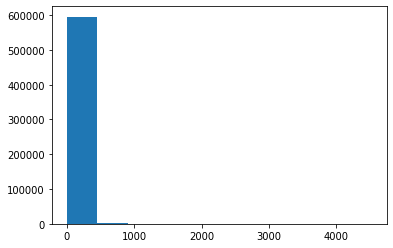

In [16]:
import matplotlib.pyplot as plt 
plt.hist(hist_df['book_id'])

In [20]:
hist_df=hist_df.reset_index()

In [22]:
new_users=hist_df[hist_df['book_id']==1]['user_id'].tolist()

In [36]:
new_users

['00000377eea48021d3002730d56aca9a',
 '000157e3ce0c74601d277cbb352101ed',
 '0001592d9ddd2588d815969f86132b49',
 '00036c901ef0fb6de35a9b326ec1c964',
 '0004ae25e3cf5f5a44b6f1ccfdd3d343',
 '00052f373c101767aca448f09a9b07e5',
 '0006260d1064c7534a3d2e8a0f0ee62e',
 '000759c736bac331c3d90b5c03277330',
 '0008da70a705b4006dbd5aae83a47cc0',
 '00098165da6612b8b26d453fd19bb754',
 '000995bfbf8fee4024ce62842a3a57a2',
 '000ac484d2e90e85ccfa688543c3eb5b',
 '000b31669a6dcbf57eca5a4cb3a3183e',
 '000b957e213fa079506ae4492da97146',
 '000cb0e94fba750ab0985e7f0f3089a4',
 '000da63cf1a3f1ae459fa4645f852699',
 '000df52da4456a6c3e78f6c873640533',
 '000ea153b4f6f350f4f20f4a127a1f69',
 '000f50f39bfdfb4ec0116119d09dfb57',
 '001100746d77df37a667cb9695a6208e',
 '00111e8d45d09dd1295daf5970ac8965',
 '0012362f00f5ad9343e5d7fc56635fbd',
 '00123bda497068d1368fa91707728b18',
 '00124eb1101b3f579aed7651db3194c5',
 '0012a1587614f7b4fa946973180e2daa',
 '0012e5c74185ca3fc336bbfb14df2a0c',
 '00132b0f30a2405222543013b94763a7',
 

In [37]:
final_filtered=filtered[~filtered.user_id.isin(new_users)]

Logic: we want to build a robust system that works for both - users that have read a lot of books as well as for users who have not. So we plan to have every user in the test set.

In [40]:
sum(final_filtered['rating'].isnull())

0

In [41]:
g=final_filtered[['user_id','book_id','rating']].drop_duplicates()

In [46]:
unique_users=g['user_id'].unique()

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(g[['user_id','book_id']], g['rating'], test_size=0.2, random_state=42, stratify=g['user_id'])

In [70]:
train_temp=pd.concat([X_train,y_train],axis=1)
test_temp=pd.concat([X_test,y_test],axis=1)

In [71]:
len(train_temp['user_id'].unique())

497178

In [72]:
len(test_temp['user_id'].unique())

433079

In [73]:
#remove rows with users who have read only two books
train_temp=train_temp[~train_temp['user_id'].isin(users_with_two_books)]

In [74]:
#add users with 2 books randomly into train and test
data_to_split=g[g['user_id'].isin(users_with_two_books)]

In [75]:
X_extra_train, X_extra_test, y_extra_train, y_extra_test = train_test_split(data_to_split[['user_id','book_id']], data_to_split['rating'], test_size=0.5, random_state=42, stratify=data_to_split['user_id'])

In [76]:
train_extra=pd.concat([X_extra_train,y_extra_train],axis=1)
test_extra=pd.concat([X_extra_test,y_extra_test],axis=1)

In [77]:
final_train=pd.concat([train_temp,train_extra])
final_test=pd.concat([test_temp,test_extra])

In [80]:
len(final_train.user_id.unique())

497178

In [81]:
len(final_test.user_id.unique())

497178

In [82]:

import os 
os.getcwd()

'/Users/adshah/Documents/Python/Jupyter Notebooks'

In [84]:
final_train.to_csv('train.csv', index=False)
final_test.to_csv('test.csv', index= False)